
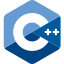
<br>

<div style="text-align:center; font-size:200%;">
 <b>String Views</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 02 String Views.ipynb -->
<!-- slides/module_190_standard_library/topic_130_string_views.cpp -->


- Zwei String-Typen:
  - `std::string`
  - `char*`, `char[]`
- Probleme:
  - Literale typischerweise `const char*`
  - Wie sollen Strings an Funktionen übergeben werden?
    - `std::string` als Wert?
    - `std::string` als Referenz?
    - `const char*`?


## String Views

- `std::string_view` ist ein Paar aus `const char*` und `size_t`
- Kann (relativ) effizient für C-style strings und `std::string` verwendet
  werden
- Kann nicht modifiziert werden
- Hat kein Eigentum an den Daten
- Kann als Parameter für Funktionen verwendet werden
  - `std::string_view` als Wert
- Soll typischerweise **nicht** als Rückgabetyp verwendet werden

In [ ]:
#include <string>
#include <string_view>

In [ ]:
std::string concat(std::string_view sv1, std::string_view sv2)
{
    std::string result{sv1};
    result += sv2;
    return result;
}

In [ ]:
using namespace std::literals;

std::string hello{"Hello, World!"};
const char* world{"Hello, World!"};

In [ ]:
concat("Hello, ", "World!"s)

In [ ]:
    concat({&hello[0], 7}, world + 7)

In [ ]:
    concat({world, 7}, hello.substr(7))

In [ ]:
    concat("Hello, "sv, {world + 7, 6})


### Vorteile gegenüber anderen Parameter-Typen

- Kann verschiedene Typen von Strings akzeptieren
- Übergeben von Substrings ist leicht möglich
- Muss für C-style Strings nicht kopieren
- Kann mit range-based `for`-Schleifen verwendet werden


### Fallstricke

- Kein Eigentum an den Daten
- Daher ist es wichtig, dass die Daten während der Lebenszeit des
  `std::string_view` gültig bleiben


## Mini-Workshop: String Views

Schreiben Sie eine Funktion `to_lower()`, die eine String-View als Argument
akzeptiert und einen `std::string` zurückgibt, der die Zeichen des String in
Kleinbuchstaben enthält.

In [ ]:
#include <string_view>

In [ ]:
#include <algorithm>
#include <string>

In [ ]:
std::string to_lower(std::string_view sv)
{
    std::string result;
    result.reserve(sv.size());
    for (char c : sv) {
        result.push_back(std::tolower(c));
    }
    return result;
}

In [ ]:
to_lower("Hello, World!"sv)

In [ ]:
std::string to_lower_2(std::string_view sv)
{
    std::string result{};
    result.reserve(sv.size());
    std::transform(
        sv.begin(), sv.end(), std::back_inserter(result),
        [](unsigned char c) { return std::tolower(c); });
    return result;
}

In [ ]:
to_lower_2("Hello, World!"sv)


### Bonus-Aufgabe

Schreiben Sie eine Funktion `rot13()`, die eine String-View als Argument
akzeptiert und einen `std::string` zurückgibt, der die Zeichen des String
nach ROT13 verschlüsselt enthält.

- Konvertieren Sie nur Buchstaben, andere Zeichen sollen unverändert bleiben
- ROT13 ersetzt jeden Buchstaben durch den 13. Buchstaben nach ihm im
  Alphabet
  - `A` wird zu `N`, `B` zu `O`, `C` zu `P`, usw.
  - `N` wird zu `A`, `O` zu `B`, `P` zu `C`, usw.
  - [Wikipedia Eintrag](https://de.wikipedia.org/wiki/ROT13)

Testen Sie die Funktion, indem Sie den folgenden Text zweimal verschlüsseln:

```
The "Magic Words" are Squeamish Ossifrage!?!
```

In [ ]:
#include <algorithm>
#include <string>
#include <iostream>

In [ ]:
std::string rot13(std::string_view sv)
{
    std::string result;
    result.reserve(sv.size());
    for (char c : sv) {
        if (c >= 'A' && c <= 'Z') {
            result.push_back('A' + (c - 'A' + 13) % 26);
        } else if (c >= 'a' && c <= 'z') {
            result.push_back('a' + (c - 'a' + 13) % 26);
        } else {
            result.push_back(c);
        }
    }
    return result;
}

In [ ]:
std::string encrypted{rot13("The \"Magic Words\" are Squeamish Ossifrage!?!"sv)};
std::cout << encrypted;

In [ ]:
std::cout << rot13(encrypted);